# PREDICTING HOUSE PRICES

#### Luca Parolo s1009497 , Course in Data Mining '17 / '18

The following notebook was used for the final project of the course "Data Mining" @ Radboud University.
The goal is to predict house prices for the Kaggle competition "Predicting house prices" (https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

It is divided in 3 parts:

1. Exploration, pre-processing and feature engineering
2. Base Models
3. Stacked Regression

# PART 1 : Exploration, pre-processing and feature engineering

We load some libraries

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [166]:
import seaborn as sns

We load the dataset

In [167]:
test=pd.read_csv("C://Users//Luca//Desktop//RadboudUniversity//DataMining//personal_project//DATA//test.csv")
train=pd.read_csv("C://Users//Luca//Desktop//RadboudUniversity//DataMining//personal_project//DATA//train.csv")

print (train.shape,test.shape)

(1460, 81) (1459, 80)


As we can see we have 1460 entries for the train set and 1459 and 80 (+1) attributes. 
Now we can proceed to plot some variables to see what's their distribution. Let's use the default describe function of pandas.

In [168]:
pd.options.display.max_columns=81
pd.options.display.max_rows=100
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [169]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We drop the ID which we don't need

In [170]:
train=train.drop("Id",axis=1)
test=test.drop("Id",axis=1)

We can already see from this simple description that we have surely some missing values (for example in LotFrontage). Let's see which variables have missing values

In [171]:
np.shape(train)

(1460, 80)

In [172]:
np.shape(test)

(1459, 79)

In [173]:
def total_nan(data):
    for column in data:
        if data.loc[:,column].isnull().sum()>0:
            total=data.loc[:,column].isnull().sum()
            print("{}  :  {}".format(column,total))
            

In [174]:
total_nan(train)

LotFrontage  :  259
Alley  :  1369
MasVnrType  :  8
MasVnrArea  :  8
BsmtQual  :  37
BsmtCond  :  37
BsmtExposure  :  38
BsmtFinType1  :  37
BsmtFinType2  :  38
Electrical  :  1
FireplaceQu  :  690
GarageType  :  81
GarageYrBlt  :  81
GarageFinish  :  81
GarageQual  :  81
GarageCond  :  81
PoolQC  :  1453
Fence  :  1179
MiscFeature  :  1406


In [175]:
total_nan(test)

MSZoning  :  4
LotFrontage  :  227
Alley  :  1352
Utilities  :  2
Exterior1st  :  1
Exterior2nd  :  1
MasVnrType  :  16
MasVnrArea  :  15
BsmtQual  :  44
BsmtCond  :  45
BsmtExposure  :  44
BsmtFinType1  :  42
BsmtFinSF1  :  1
BsmtFinType2  :  42
BsmtFinSF2  :  1
BsmtUnfSF  :  1
TotalBsmtSF  :  1
BsmtFullBath  :  2
BsmtHalfBath  :  2
KitchenQual  :  1
Functional  :  2
FireplaceQu  :  730
GarageType  :  76
GarageYrBlt  :  78
GarageFinish  :  78
GarageCars  :  1
GarageArea  :  1
GarageQual  :  78
GarageCond  :  78
PoolQC  :  1456
Fence  :  1169
MiscFeature  :  1408
SaleType  :  1


As we can see we have many missing values. But if we check which are the varibales that have the most missing values, and reading the description of the dataset , we can understand how this make actually sense. In most cases infact the missing values(NaN) is just to say that the feature is not present 

Therefore we impute the missing values and we will change the value to "None" or "0" in the case the missing values means that the varibale is not present, otherwise we try to impute the value using the most common value of the variable.


In [176]:
##The following are the categorical variables that present NaNs that we want to replace with None
toreplace=['Alley', "LotFrontage",   'BsmtCond','MasVnrType','BsmtQual','BsmtExposure',    'BsmtFinType1', 'BsmtFinType2',    'FireplaceQu',    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',    'PoolQC',    'Fence',    'MiscFeature']

for column in toreplace:
    train[column]=train[column].fillna("None")
    test[column]=test[column].fillna("None")


We do the same thing for the numerical variable 

In [177]:
##The following are the numerical variables that present NaNs that we want to replace with None

toreplace=['BsmtFullBath','MasVnrArea', 'BsmtHalfBath', 'TotalBsmtSF',  'GarageYrBlt',   'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',     'GarageArea', 'GarageCars']
for column in toreplace:    
    train[column]=train[column].fillna(0)
    test[column]=test[column].fillna(0)


We now still have the missing values which are probably true missing values. Let's see how many and where

In [178]:
total_nan(train)

Electrical  :  1


In [179]:
total_nan(test)

MSZoning  :  4
Utilities  :  2
Exterior1st  :  1
Exterior2nd  :  1
KitchenQual  :  1
Functional  :  2
SaleType  :  1


So we can proceed to impute the missing values with the mean in the case of a numeric value or with the mode in case of a non numeric, to try to preserve as much information as we can

In [180]:
print(type(train.Electrical[0]),type(train.MSZoning[0]),type(train.Electrical[0]),
type(train.Functional[0]),
type(train.Utilities[0]),
type(train.SaleType[0]),
type(train.KitchenQual[0]),
type(train.Exterior2nd[0]),
type(train.Exterior1st[0]))

<class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'> <class 'str'>


As we have only string we can use the mode

In [181]:
print(train.Electrical.mode(),
train.MSZoning.mode(),
train.Functional.mode(),
train.Utilities.mode(),
train.SaleType.mode(),
train.KitchenQual.mode(),
train.Exterior2nd.mode(),
train.Exterior1st.mode())

0    SBrkr
dtype: object 0    RL
dtype: object 0    Typ
dtype: object 0    AllPub
dtype: object 0    WD
dtype: object 0    TA
dtype: object 0    VinylSd
dtype: object 0    VinylSd
dtype: object


In [182]:
train.Electrical=train.Electrical.fillna("SBrkr")
test.MSZoning=test.MSZoning.fillna("RL")
test.Functional=test.Functional.fillna("Typ")
test.Utilities=test.Utilities.fillna("AllPub")
test.SaleType=test.SaleType.fillna("WD")
test.KitchenQual=test.KitchenQual.fillna("TA")
test.Exterior2nd=test.Exterior2nd.fillna("VinylSd")
test.Exterior1st=test.Exterior1st.fillna("VinylSd")

Let's check if we have missed something

In [183]:
total_nan(test)
total_nan(train)

Ok, now we should have filled all the missing values preserving most of the information. Now we can check some distribution and plot. We first check how some numerical variables behave

As what we are ultimatly interested in the sale price , let's check the distribution of the SalePrice variable. To do so we use an histogam.

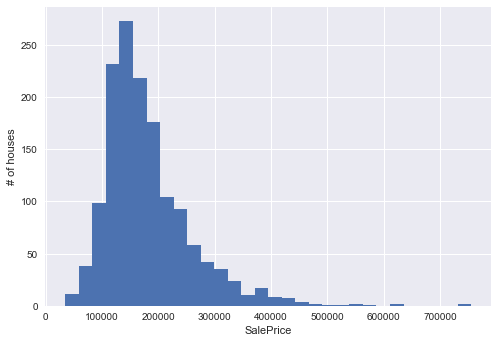

In [184]:
plt.hist(train.SalePrice,bins=30)
plt.xlabel("SalePrice")
plt.ylabel("# of houses")
plt.show()

Ok so it looks right skewed. This may be a problem when we compute the error. In fact if we leave the distribution like this ,the right most values are going to weight more compare to the values in the left part of the distribution. To solve this problem we can, in this case ,just take the log of the SalePrice variable

In [185]:
train.SalePrice=np.log(train.SalePrice)


In [186]:
train.SalePrice[1]

12.109010932687042

Let's try again!

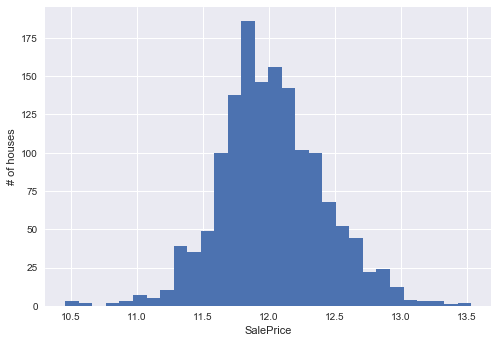

In [187]:
plt.hist(train.SalePrice,bins=30)
plt.xlabel("SalePrice")
plt.ylabel("# of houses")
plt.show()

Yes,that looks much better now.

Now to understand how each attribute is related to each other is nice to look at the correlation matrix.

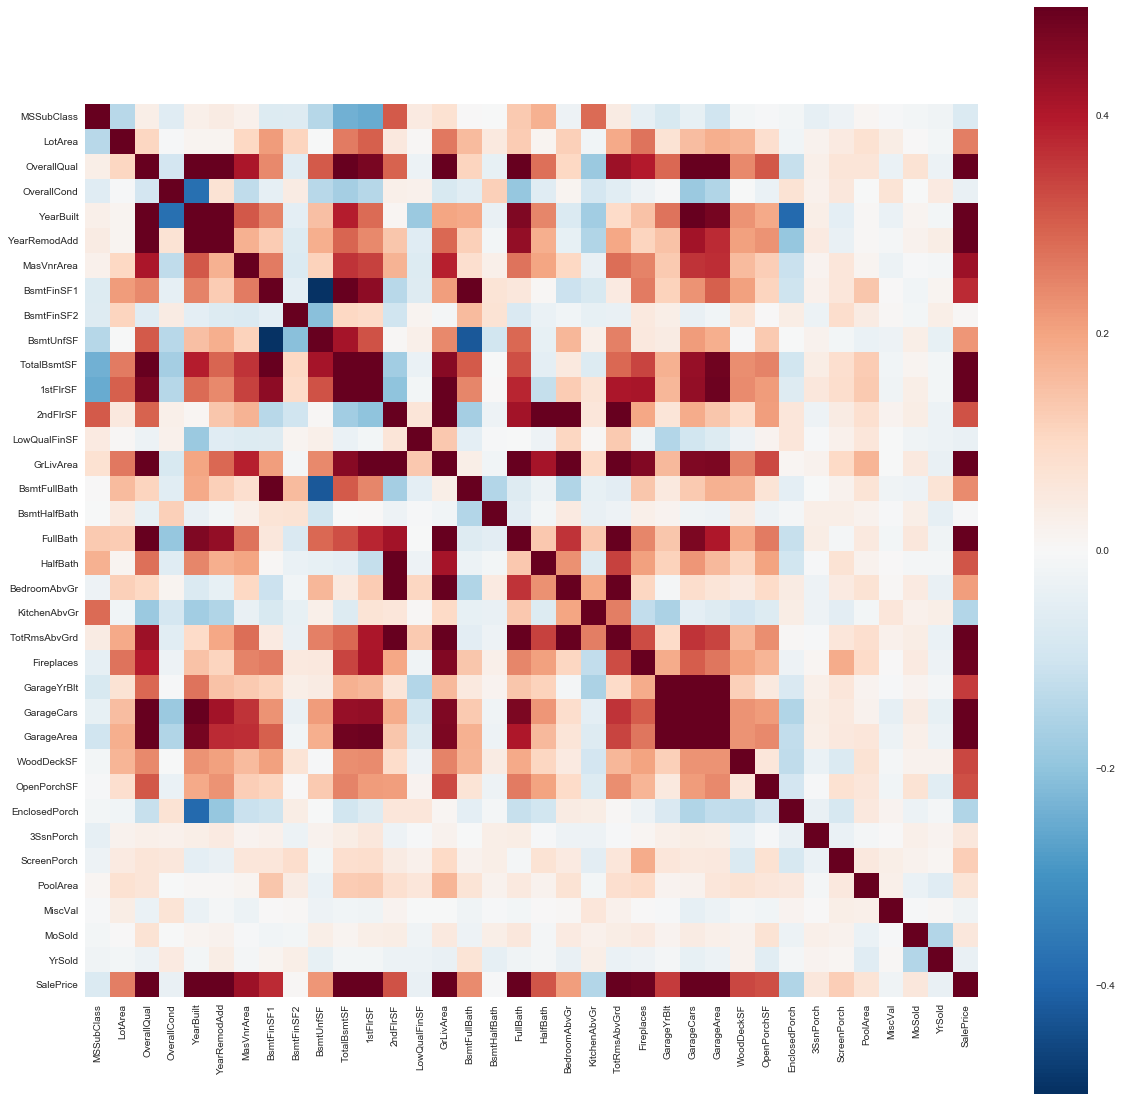

In [188]:
corrmat = train.corr()
plt.figure(1,figsize=(20,20))
sns.heatmap(corrmat, vmax=0.5 ,square=True)
plt.show()

OK , so we have some red here and there. In the last row of the above matrix we can see the correlation for our target. The most correlated at a first sight looks to be the OverallQual (overall quality), but also the YearBuilt the GRLivArea( living space above ground) the GarageCars and GarageArea looks pretty red. We also see that there are some possible fenomena of collinearity as we may expected. Some of the variables are highly correlated between them, and this in many case is quite obvious ( it's easy to expect that the number of cars that fit in the garage is correlated with the garage area for example). keeping this in mind we can for example augment the dataset by one variable , which is the overall area of the house.

From the above correlation matrix we also see possible phenomenon of multicollinearity 

In [189]:
train["total_area"]=train["GrLivArea"]+train["TotalBsmtSF"]

In [190]:
test["total_area"]=test["GrLivArea"]+test["TotalBsmtSF"]

Let's see how is the correlation now between the new variable and the Sale price.

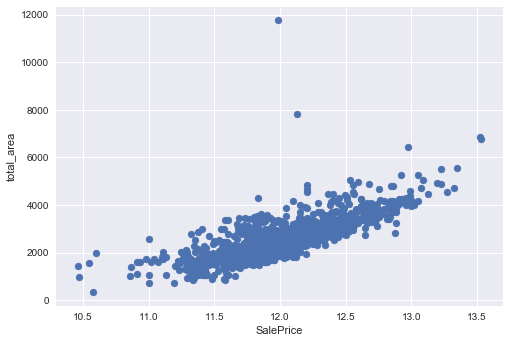

In [191]:
plt.scatter(train.SalePrice,train["total_area"],)
plt.xlabel("SalePrice")
plt.ylabel("total_area")
plt.show()

So it looks to be a linear correlation ,as we of course exepcted, between the 2 varibales.However the plot points out some outliers that we haven't considered yet. Let's see if and many other outliers we have

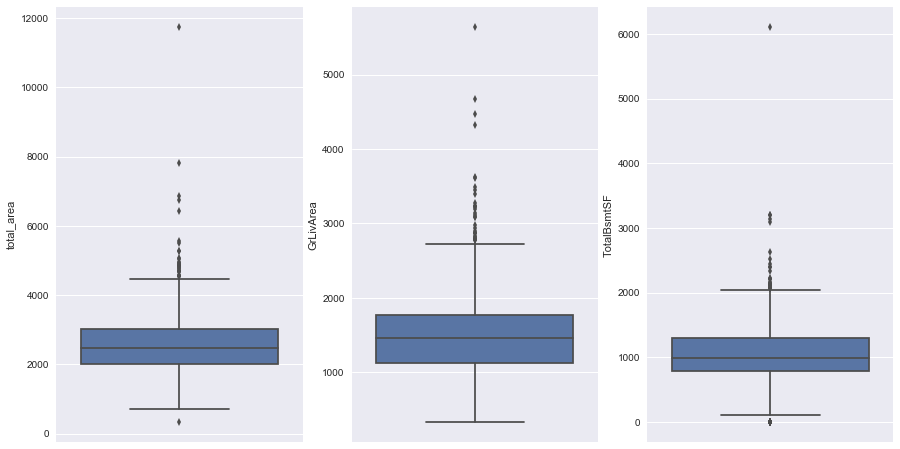

In [192]:
plt.figure(1,figsize=(15,8))
plt.subplot(1,3,1)
sns.boxplot(train.total_area,orient="v")
plt.subplot(1,3,2)
sns.boxplot(train.GrLivArea,orient="v")
plt.subplot(1,3,3)
sns.boxplot(train.TotalBsmtSF,orient="v")
plt.show()

As we see from the boxplot more than 2 entries are considered formally. However in the previoud scatterplot many "extreme" values seemed to follow the linear trend , while only 2 seemed real outliers( too low price for the total area).
We proceed to eliminate only those 2. 

In [193]:
train.total_area.sort_values()[-2:]

523      7814
1298    11752
Name: total_area, dtype: int64

So the entries that we drop are the #523 and #1298

In [194]:
train=train.drop(train.index[523])

In [195]:
train.iloc[523]

MSSubClass            60
MSZoning              RL
LotFrontage           95
LotArea            11787
Street              Pave
Alley               None
LotShape             IR1
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     NoRidge
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual            7
OverallCond            5
YearBuilt           1996
YearRemodAdd        1997
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
MasVnrArea           594
ExterQual             Gd
ExterCond             TA
Foundation         PConc
BsmtQual              Gd
BsmtCond              TA
BsmtExposure          No
BsmtFinType1         GLQ
BsmtFinSF1           719
BsmtFinType2         Unf
BsmtFinSF2             0
BsmtUnfSF            660
TotalBsmtSF         1379
Heating             GasA
HeatingQC             Ex


In [196]:
train=train.drop(train.index[1297])

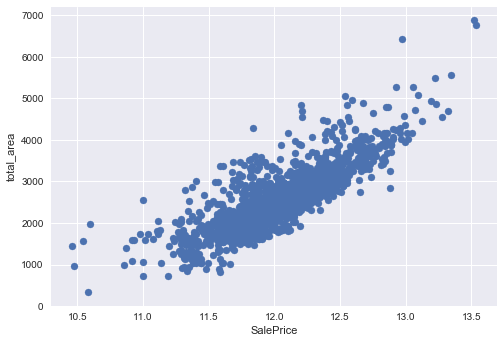

In [197]:
plt.scatter(train.SalePrice,train["total_area"],)
plt.xlabel("SalePrice")
plt.ylabel("total_area")
plt.show()

Let's now see if and how the total_area is skewed.

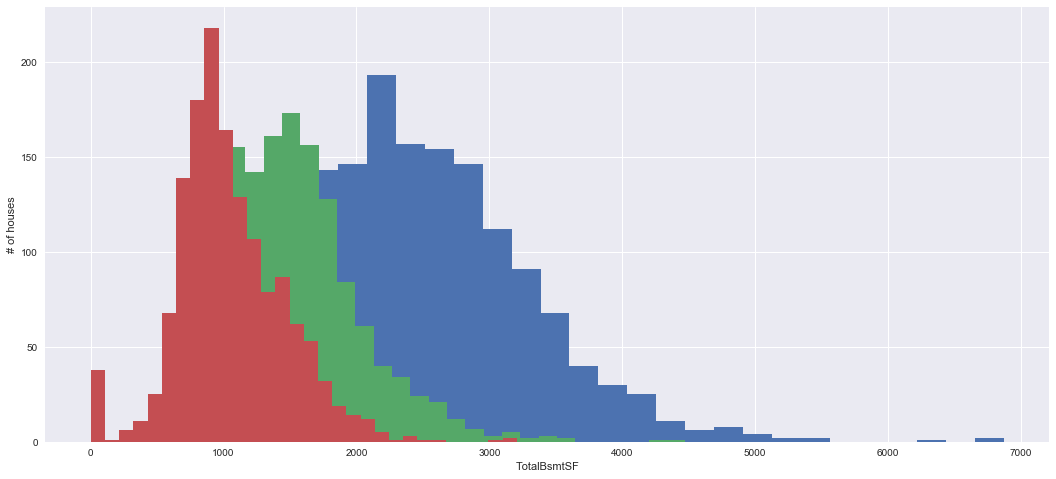

In [198]:
plt.figure(1,figsize=(18,8))
plt.hist(train.total_area,bins=30)
plt.xlabel("total_area")
plt.ylabel("# of houses")
plt.hist(train.GrLivArea,bins=30)
plt.xlabel("GrLivArea")
plt.ylabel("# of houses")
plt.hist(train.TotalBsmtSF,bins=30)
plt.xlabel("TotalBsmtSF")
plt.ylabel("# of houses")
plt.show()

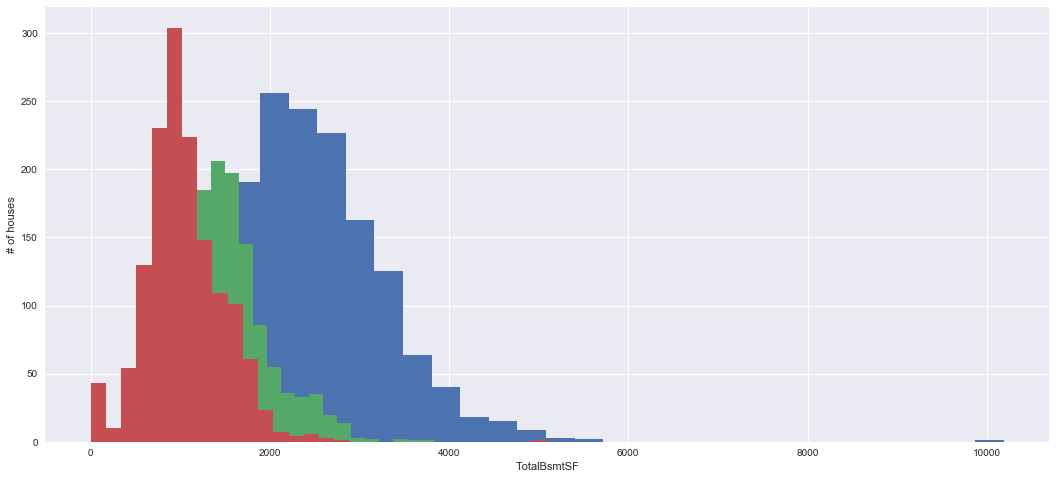

In [199]:
plt.figure(1,figsize=(18,8))
plt.hist(test.total_area,bins=30)
plt.xlabel("total_area")
plt.ylabel("# of houses")
plt.hist(test.GrLivArea,bins=30)
plt.xlabel("GrLivArea")
plt.ylabel("# of houses")
plt.hist(test.TotalBsmtSF,bins=30)
plt.xlabel("TotalBsmtSF")
plt.ylabel("# of houses")
plt.show()

Well, as we see the 3 varibales are all right skewed, as it was the SalePrice variable, therefore we proceed to do the same thing we did with SalePrice and takie the logarithm

In [200]:
train.total_area=np.log(train.total_area)
train.GrLivArea=np.log(train.GrLivArea)

In [201]:
test.total_area=np.log(test.total_area)
test.GrLivArea=np.log(test.GrLivArea)

For the built variable we get rid of zeros, otherwise we can't take the log

In [202]:
for p in train.index:
    if train.TotalBsmtSF[p] == 0:
        train.TotalBsmtSF[p]=1

C:\Users\Luca\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [203]:
for p in test.index:
    if test.TotalBsmtSF[p] == 0:
        test.TotalBsmtSF[p]=1

C:\Users\Luca\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [204]:
train.TotalBsmtSF=np.log(train.TotalBsmtSF)

In [205]:
test.TotalBsmtSF=np.log(test.TotalBsmtSF)

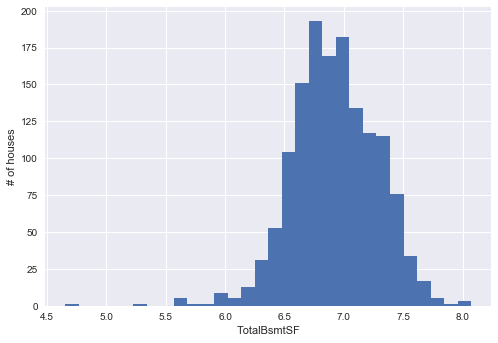

In [206]:
plt.hist(train[train.TotalBsmtSF>0]['TotalBsmtSF'],bins=30)
plt.xlabel("TotalBsmtSF")
plt.ylabel("# of houses")
plt.show()

Then we can put back the zeros in the right place

In [207]:
for p in train.index:
    if train.TotalBsmtSF[p] == 1:
        train.TotalBsmtSF[p]=0

In [208]:
for p in test.index:
    if test.TotalBsmtSF[p] == 1:
        test.TotalBsmtSF[p]=0

We save the SalePrice and we drop if from the dataset

In [209]:
y=train.SalePrice

In [210]:
train=train.drop(["SalePrice"],axis=1)

Then we make dummy variables.

In [211]:
test_train = pd.concat((train, test)).reset_index(drop=True)

In [212]:
#convert categorical variable into dummy
test_train = pd.get_dummies(test_train)

In [213]:
np.shape(test_train)

(2917, 430)

In [214]:
train = test_train[:1458]
test = test_train[1458:]

In [215]:
np.shape(train)

(1458, 430)

# PART 2: Base models

Now we can start with our models. We first train and test each model separately and see how they perform. After we will train each model using kfold and we will train a meta learner with the predictions of the 3 models, which is the ensemble method called stacking

In [216]:
from sklearn.ensemble import GradientBoostingRegressor

In [217]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=1, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [218]:
GBoost.fit(train,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=1,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

In [219]:
predictions_GBoost=GBoost.predict(test)

In [220]:
predictions_GBoost=np.exp(predictions_GBoost)

In [221]:
predictions_GBoost[1]

157955.40285520823

We save the predictions in a excel file so we can upload it to Kaggle and see the performance of the model

In [222]:
final=[["id","SalePrice"]]
count=1461
for pred in predictions_GBoost:
    data=[]
    data.append(count)
    data.append(pred)
    final.append(data)
    count=count+1
    

In [223]:
import csv

In [224]:
myFile = open('predictions_GBoost.csv', 'w', newline='')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(final)

According to the kaggle RMSE this model alone scores 0.1211 which ranks at the 963/5249 th place

Now we can try with the second model which is a Random Forest Regressor

In [225]:
from sklearn.ensemble import RandomForestRegressor

In [226]:
## regr = RandomForestRegressor(n_estimators=3000,min_samples_leaf=15, min_samples_split=10, criterion='mse',max_depth=50, random_state=0)

In [227]:
regr = RandomForestRegressor(n_estimators=3000,min_samples_leaf=15, min_samples_split=10, criterion='mse',max_depth=100, random_state=0)

In [228]:
regr.fit(train,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [229]:
prediction_RFF=regr.predict(test)

In [230]:
prediction_RFF=np.exp(prediction_RFF)

In [231]:
prediction_RFF[1]

154224.57174921627

In [232]:
np.shape(prediction_RFF)

(1459,)

In [233]:
final_RFF=[["id","SalePrice"]]
count=1461
for pred in prediction_RFF:
    data=[]
    data.append(count)
    data.append(pred)
    final_RFF.append(data)
    count=count+1

In [235]:
myFile = open('prediction_RFF.csv', 'w', newline='')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(final_RFF)

The RFF scores 0.15924


Now we can train the ElacticNet

In [236]:
from sklearn.linear_model import ElasticNet

In [237]:
elasticNet=ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

In [238]:
elasticNet.fit(train,y)

ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False)

In [239]:
prediction_EN=elasticNet.predict(test)

In [240]:
prediction_EN=np.exp(prediction_EN)

In [241]:
np.shape(final_EN)

(1460, 2)

In [242]:
final_EN=[["id","SalePrice"]]
count=1461
for pred in prediction_EN:
    data=[]
    data.append(count)
    data.append(pred)
    final_EN.append(data)
    count=count+1

In [243]:
myFile = open('prediction_ElasticNet.csv', 'w', newline='')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(final_EN)

This scores 0.11980, placing 803th

# PART 3: Stacking models

Now that we have tried with our 3 models separately, we can do the following:
1) Averaging them and see how this changes the RMSE
2) train again the model with Kfold with n=3 , then train the meta learner on the prediction of the first 3 models and then test it with the test set

So, let's first average the predcition of the models. To average them we unbalanced the data a little bit, giving more weight to the models that scored better

In [244]:
averaged=((prediction_EN*0.4)+(prediction_RFF*0.2)+(predictions_GBoost*0.4))

In [245]:
np.shape(final_EN)

(1460, 2)

In [246]:
averaged[0]

123076.034876066

In [247]:
final_averaged=[["id","SalePrice"]]
count=1461
for pred in averaged:
    data=[]
    data.append(count)
    data.append(pred)
    final_averaged.append(data)
    count=count+1

In [248]:
myFile = open('prediction_averaged.csv', 'w', newline='')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(final_averaged)

In [249]:
np.shape(final_averaged)

(1460, 2)

The simple averaged model scores : 0.12006

NOw we can start to build a more "sophisticated" stacking model, using a meta leraner that will be trained on the predictions of the three different base models.

In [426]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [439]:
kf = KFold(n_splits=2, random_state=1, shuffle=False)

In [440]:
train_B,train_A=kf.split(train)

In [441]:
train_A_df=pd.DataFrame()
train_B_df=pd.DataFrame()

In [442]:
train_A_df=train_A_df.append(train.iloc[train_A[0]])
train_B_df=train_B_df.append(train.iloc[train_B[0]])

In [452]:
y_A=pd.DataFrame()
y_B=pd.DataFrame()

In [453]:
y_A=y_A.append(y.iloc[train_A[1]])
y_B=y_B.append(y.iloc[train_B[1]])

In [454]:
y_B

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729
SalePrice,12.247694,12.109011,12.317167,11.849398,12.429216,11.8706,12.634603,12.206073,11.77452,11.67844,11.771436,12.7513,11.877569,12.540758,11.964001,11.790557,11.911702,11.407565,11.976659,11.842229,12.692503,11.845103,12.345835,11.77452,11.944708,12.454104,11.811547,12.63134,12.242887,11.134589,10.596635,11.914048,12.100156,12.016726,12.533576,12.641097,11.884489,11.938193,11.599103,11.314475,...,11.856515,13.534473,12.721886,11.594321,11.860055,12.078239,11.396392,11.723996,11.838626,12.18587,12.65236,11.849398,12.799176,11.849398,12.269047,10.915088,12.618182,12.44509,12.098153,11.607326,10.858999,11.540307,12.149502,11.767568,11.779129,12.013701,11.979799,11.964001,12.739638,11.763684,12.524526,11.8706,11.732061,11.81303,12.676076,11.699405,12.310433,12.178187,11.608236,11.542484


In [455]:
y_AA=y_B.iloc[0]
y_BB=y_A.iloc[0]

Now we can train the three models on the new training set A and make predictions for B and for the test set.

In [308]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=1, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [459]:
GBoost.fit(train_A_df,y_AA)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=1,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

In [460]:
GBoost_pred_B=GBoost.predict(train_B_df)

In [467]:
GBoost_pred_C=GBoost.predict(test)

In [461]:
RFF = RandomForestRegressor(n_estimators=3000,min_samples_leaf=15, min_samples_split=10, criterion='mse',max_depth=100, random_state=0)

In [462]:
RFF.fit(train_A_df,y_AA)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=15, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [463]:
RFF_pred_B=RFF.predict(train_B_df)

In [468]:
RFF_pred_C=RFF.predict(test)

In [464]:
elasticNet=ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

In [465]:
elasticNet.fit(train_A_df,y_AA)

ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False)

In [466]:
elasticNet_pred_B=elasticNet.predict(train_B_df)

In [469]:
elasticNet_pred_C=elasticNet.predict(test)

In [470]:
B1_data = {'col1': GBoost_pred_B, 'col2': RFF_pred_B,'col3':elasticNet_pred_B}

In [471]:
B1 = pd.DataFrame(data=B1_data)

In [472]:
C1_data = {'col1': GBoost_pred_C, 'col2': RFF_pred_C,'col3':elasticNet_pred_C}

In [473]:
C1 = pd.DataFrame(data=C1_data)

Now we train the meta learner on B1 and then we predict on C1. As meta learner we use ridge regressor

In [477]:
from sklearn.linear_model import Ridge

In [478]:
rid = Ridge(alpha=0.9)

In [479]:
rid.fit(B1,y_BB)

Ridge(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [480]:
ridge_pred=rid.predict(C1)

In [483]:
ridge_pred=np.exp(ridge_pred)

In [484]:
final_Ridge_pred=[["id","SalePrice"]]
count=1461
for pred in ridge_pred:
    data=[]
    data.append(count)
    data.append(pred)
    final_Ridge_pred.append(data)
    count=count+1

In [485]:
myFile = open('final_Ridge_pred.csv', 'w', newline='')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(final_Ridge_pred)

Score of 0.12252

We try using the Ridge but this time we don't count the RFF as base model

In [486]:
B1_data_bis = {'col1': GBoost_pred_B ,'col2':elasticNet_pred_B}

In [487]:
B1_bis = pd.DataFrame(data=B1_data)

In [488]:
C1_data_bis = {'col1': GBoost_pred_C, 'col2':elasticNet_pred_C}

In [489]:
C1_bis = pd.DataFrame(data=C1_data)

In [490]:
rid2 = Ridge(alpha=0.9)

In [491]:
rid2.fit(B1_bis,y_BB)

Ridge(alpha=0.9, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [494]:
ridge2_pred=rid2.predict(C1)

In [495]:
ridge2_pred=np.exp(ridge2_pred)

In [498]:
final_Ridge2_pred=[["id","SalePrice"]]
count=1461
for pred in ridge2_pred:
    data=[]
    data.append(count)
    data.append(pred)
    final_Ridge2_pred.append(data)
    count=count+1

In [499]:
myFile = open('final_Ridge2_pred.csv', 'w', newline='')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(final_Ridge2_pred)

Score of 0.12252

Let's see if using an EN as meta learner improves the score

In [500]:
elasticNet.fit(B1_bis,y_BB)

ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=3, selection='cyclic', tol=0.0001, warm_start=False)

In [501]:
EN_bis=elasticNet.predict(C1)

In [502]:
EN_bis=np.exp(EN_bis)

In [503]:
EN_BIs_Final=[["id","SalePrice"]]
count=1461
for pred in EN_bis:
    data=[]
    data.append(count)
    data.append(pred)
    EN_BIs_Final.append(data)
    count=count+1

In [504]:
myFile = open('EN_BIs_Final.csv', 'w', newline='')
with myFile:
    writer = csv.writer(myFile)
    writer.writerows(EN_BIs_Final)

Score of 0.12243